# Chapter 2: Second Order ODE

Here we will consider ordinary differential equations that are second order in time, such as the equation of motion for a cannonball, baseball, etc. Consider Newton's second law for a cannonball without air resistance:

$$\begin{align} 
\frac{d^2x}{dt^2} & = 0 \\
\frac{d^2y}{dt^2} & = -g \\
\end{align}$$

We *could* write a finite difference algorithm directly for the position $x$ as a function of $\Delta t$, but this would require the previous position and the position before. Instead, we will proceed using a set of two equations for each direction: One for the position, and one for the velocity.

## Projectile Motion, No Air Resistance
Consider a cannonball launched at an angle $\theta$ from the horizontal with an initial speed $v_0$: 
![projectile](./projectile.png)
Now write each of the 2nd order equations above as two first order equations:
$$\frac{dx}{dt}=v_x \hspace{2em} \frac{dv_x}{dt}=0 \hspace{4em}
\frac{dy}{dt}=v_y \hspace{2em} \frac{dv_y}{dt}=-g  $$

This set of equations can be handled in the computer using the Euler method that we used for radioactive decay:


$$\begin{align} 
x_{i+1} & = x_i + v_{x,i}\Delta t \\
v_{x,i+1} & = v_{x,i} \\
y_{i+i} & = y_i + v_{y,i}\Delta t \\
v_{y,i+i} & = v_{y,i} - g\Delta t 
\end{align}$$

**Normalization.** To determine a solution we need to set the initial values. For projectile motion, we usually specify the launch angle $\theta$ and the initial speed $v_0$. The initial speed and acceleration of gravity $g$ together determine the lengthscale $x_0$ and timescale $t_0$ in the problem: 

$$ t_0 = \frac{v_0}{g},  \hspace{2em} v_0=\frac{x_0}{t_0}\rightarrow x_0=v_0t_0$$

Here is a longer way (via the "recipe") to the normaliztion. Let's start with the equation for the acceleration in $y$: 

$$\frac{dv_y}{dt} = -g$$
Factor out $v_0$ and $t_0$ from the derivative:

$$\frac{v_0}{t_0}\frac{d\bar{v}_y}{d\bar{t}} = -g $$

Multiply through by $t_0/v_0$:

$$\frac{d\bar{v}_y}{d\bar{t}} = -g\frac{t_0}{v_0}$$

Now we demand that the constants on the R.H.S. equal 1:

$$g\frac{t_0}{v_0}=1$$
This has two consequences:
1. It defines $t_0$ in terms of the initial speed and $g$:

$$t_0 = \frac{v_0}{g}$$

2. And therefore, our normalized/nondimensionalized/ equation for $dv_0/dt$ becomes simply (dropping the overbars):

$$\frac{dv_y}{dt} = -1$$

This is the equation that we iterate via Euler in the code cell below to go from $v_{y,i-1}$ to $v_{y,i}$ (see line where `tmp4` is computed).

Let's take a look at how to implement this in code:


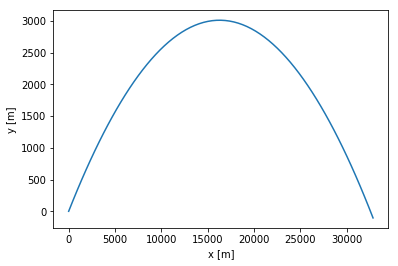

In [9]:
#import array as arr
import matplotlib.pyplot as plt
import math as math

v0 = 700.0
theta = 20.0
g = 9.81
# normalizations in t and x,y
t0 = v0/g
x0 = v0*t0
y0 = v0*t0
# timestep
dt = 0.01 

# declare arrays to store positions and velocities
x = []
y = []
vx = []
vy = []
#x = arr.array('f', [])
#vx = arr.array('f', [])
#y = arr.array('f', [])
#vy = arr.array('f', [])

#note that the initial x and y components of velocity have been normalized by v0
theta_rad = math.radians(theta)
vx0 = math.cos(theta_rad)
vy0 = math.sin(theta_rad)

# push the initial conditions onto our arrays that will store positions and velocities:
x.append(0.0)
vx.append(vx0)
y.append(0.00001)
vy.append(vy0)

# could iterate for a set number of timesteps...
#for i in range (1,50):
i=1
# but instead let's iterate until the projectile comes back down:
while y[i-1] > 0.0:

    # here we compute the next position and velocity in x and y 
    # storing these as tmp vars to make the code super clear
    tmp1 = x[i-1] + vx[i-1]*dt
    tmp2 = vx[i-1]
    tmp3 = y[i-1] + vy[i-1]*dt
    tmp4 = vy[i-1] - dt
    #note that in nondimensionalized form, g = 1.0 
    #if we just wrote it out w/o normlzing, next line would be tmp3 = vy[i-1] - g*dt
    
    #push the new positions and velocities onto the arrays
    x.append(tmp1)
    vx.append(tmp2)
    y.append(tmp3)
    vy.append(tmp4)
    i+=1

# here I convert back to dimensionfull numbers, but you could do this 
# just by rescaling the axes as well. If you want to see the dimensionless version, plot x,y
x_dim = [i*x0 for i in x]
y_dim = [i*y0 for i in y]
#y = y0**y
    
plt.plot(x_dim,y_dim)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()


[look at variation of the trajectory with $\theta$, and how the approximation depends on $dt$.]

**Question:** How would you convert the output back into the dimensions of the problem?

## Projectile Motion: Including Air Resistance
Consider an object falling through the atmosphere. We know that collisions with air molecules exert a dissipative (nonconservative) force on the body, which does work opposite the direction of motion and therefore slows the object down. On what does this force depend?

We postulate a Taylor series in the velocity for the drag force:
$$F_{\text{drag}}=-B_1v - B_2v^2$$

The first term is the "Stokes's Law" result. (or is it Stokes'? The guy's name was Stokes, not Stoke. I guess it's like Green's function, and so it should be Stokes's.) This term dominates in low Reynolds number fluids, but for a low density, high Reynolds number fluid like air, the $v^2$ term dominates. 

$B_2$ can not be computed analytically, but we can obtain a reasonable approximation through our intuition about the problem. Consider an object (cannonball, skydiver) of cross section $A$ moving through an atmosphere of density $\rho$ with velocity $v$. The air molecules of mass $m$ collide with you and thus each acquires a kinetice energy $\text{KE} \approx \frac{1}{2}mv^2$. (This is like the basketball/superball elastic collision problem.)

As the object moves a linear distance $\ell$ through the air, the work done by the air on the falling object is therefore $\text{KE} = \frac{1}{2}\rho A \ell v^2$. And since that work was performed over the linear distance $\ell$, the drag force is $F_{drag}=\text{Work}/\ell$: $$F_{drag} = \frac{1}{2}C\rho A v^2$$ where we have introduced an empirical constant C (a.k.a fudge factor) to account for the effects that we left out. (Aerodynamics, etc.) 

The takeaway is that the drag force is proportional to $v^2$, and is directed opposite the direction of motion. In two dimensions, we have to break it into its x and y components in order to incorporate it into our Euler-discretized equation of motion. Letting $B_2=\frac{1}{2}C\rho A$: 

$$\begin{align} 
F_{drag} & = -B_2v^2 \\
F_{x,drag} & = -B_2v^2\text{cos}\theta = -B_2v^2\frac{v_x}{v} = -B_2vv_x\\
F_{y,drag} & = -B_2v^2\text{sin}\theta = -B_2v^2\frac{v_y}{v} = -B_2vv_y\\ 
\end{align}$$

![drag diagram](./drag_diagram.png)

Incorporating these new forces into our Euler algorithm we obtain:

$$\begin{align} 
x_{i+1} & = x_i + v_{x,i}\Delta t \\
v_{x,i+1} & = v_{x,i} - \frac{B_2vv_{x,i}}{m}\Delta t \\
y_{i+i} & = y_i + v_{y,i}\Delta t \\
v_{y,i+i} & = v_{y,i} - g\Delta t - \frac{B_2vv_{y,i}}{m}\Delta t
\end{align}$$

**Normalization.** Let's start with the equation for $dv_y$, and factor out $v_0$ and $t_0$:

$$\frac{v_0}{t_0}\frac{d\bar{v}_y}{d\bar{t}} = -g - B_2v^2_0\frac{\bar{v}\bar{v}_y }{m} $$

Then multiply through by $t_0/v_0$:

$$\frac{d\bar{v}_y}{d\bar{t}} = -\frac{t_0g}{v_0} - B_2\frac{t_0}{v_0}v^2_0\frac{\bar{v}\bar{v}_y }{m} $$

From above, $t_0g/v_0 = 1$. That leaves us with the $B_2$ coefficient to nondimensionalize. Cancelling a factor of $v_0$, we define:

$$\bar{B}_2 = \frac{v_0t_0}{m}B_2$$

**Exercise:** Check that $\bar{B}_2$ is dimensionless

**Exercise:** Take $v_0=700$ m/s, $B_2 = 0.0012$, and $m = 30$ kg and see that $B_2$ is of order 1. (It's about 2.)

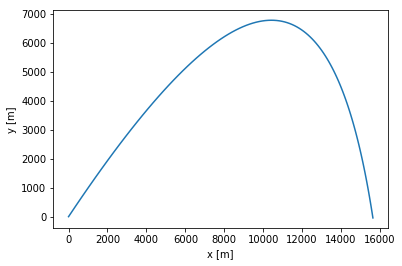

In [10]:
# import array as arr
import matplotlib.pyplot as plt
import math as math

# muzzle velocity of a 5" gun from Wikipedia
v0 = 700.0
theta = 45.0
g = 9.81
# B2 is taken from the Giordano book. the mass of a 5" shell is taken from Wikipedia
B2 = 0.0012
m = 30.0
# normalizations in t and x,y
t0 = v0/g
x0 = v0*t0
y0 = v0*t0
# NOTE: If you compute B2_bar, you will find it to be of O(1).
B2_bar = v0*t0*B2/m
# timestep
dt = 0.01 

# declare lists to store positions and velocities
x = []
y = []
vx = []
vy = []
#x = arr.array('f', [])
#vx = arr.array('f', [])
#y = arr.array('f', [])
#vy = arr.array('f', [])

#note that the initial x and y components of velocity have been normalized by v0
theta_rad = math.radians(theta)
vx0 = math.cos(theta_rad)
vy0 = math.sin(theta_rad)

# push the initial conditions onto our arrays that will store positions and velocities:
x.append(0.0)
vx.append(vx0)
y.append(0.00001)
vy.append(vy0)

# could iterate for a set number of timesteps...
#for i in range (1,50):
i=1
# but instead let's iterate until the projectile comes back down:
while y[i-1] > 0.0:

    # here we compute the next position and velocity in x and y 
    # storing these as tmp vars to make the code super clear
    tmp1 = x[i-1] + vx[i-1]*dt
    tmp3 = y[i-1] + vy[i-1]*dt
    #try to avoid sqrt, it is slow. but I'm lazy, and it makes no diff here.
    v = math.sqrt(vx[i-1]**2 + vy[i-1]**2)
    tmp2 = vx[i-1] - B2_bar*vx[i-1]*dt
    tmp4 = vy[i-1] - (1 + B2_bar*vy[i-1])*dt
    #note that in nondimensionalized form, g = 1.0 
    #if we just wrote it out w/o normlzing, next line would be tmp3 = vy[i-1] - g*dt
    
    #push the new positions and velocities onto the arrays
    x.append(tmp1)
    vx.append(tmp2)
    y.append(tmp3)
    vy.append(tmp4)
    i+=1
# putting back in the dimensions
x_dim = [i*x0 for i in x]
y_dim = [i*y0 for i in y]

plt.plot(x_dim,y_dim)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()
